## Space Titanic Project

- This is a competition of Kaggle's. The goal is to correctly predict which passengers are transported to an alternate dimension

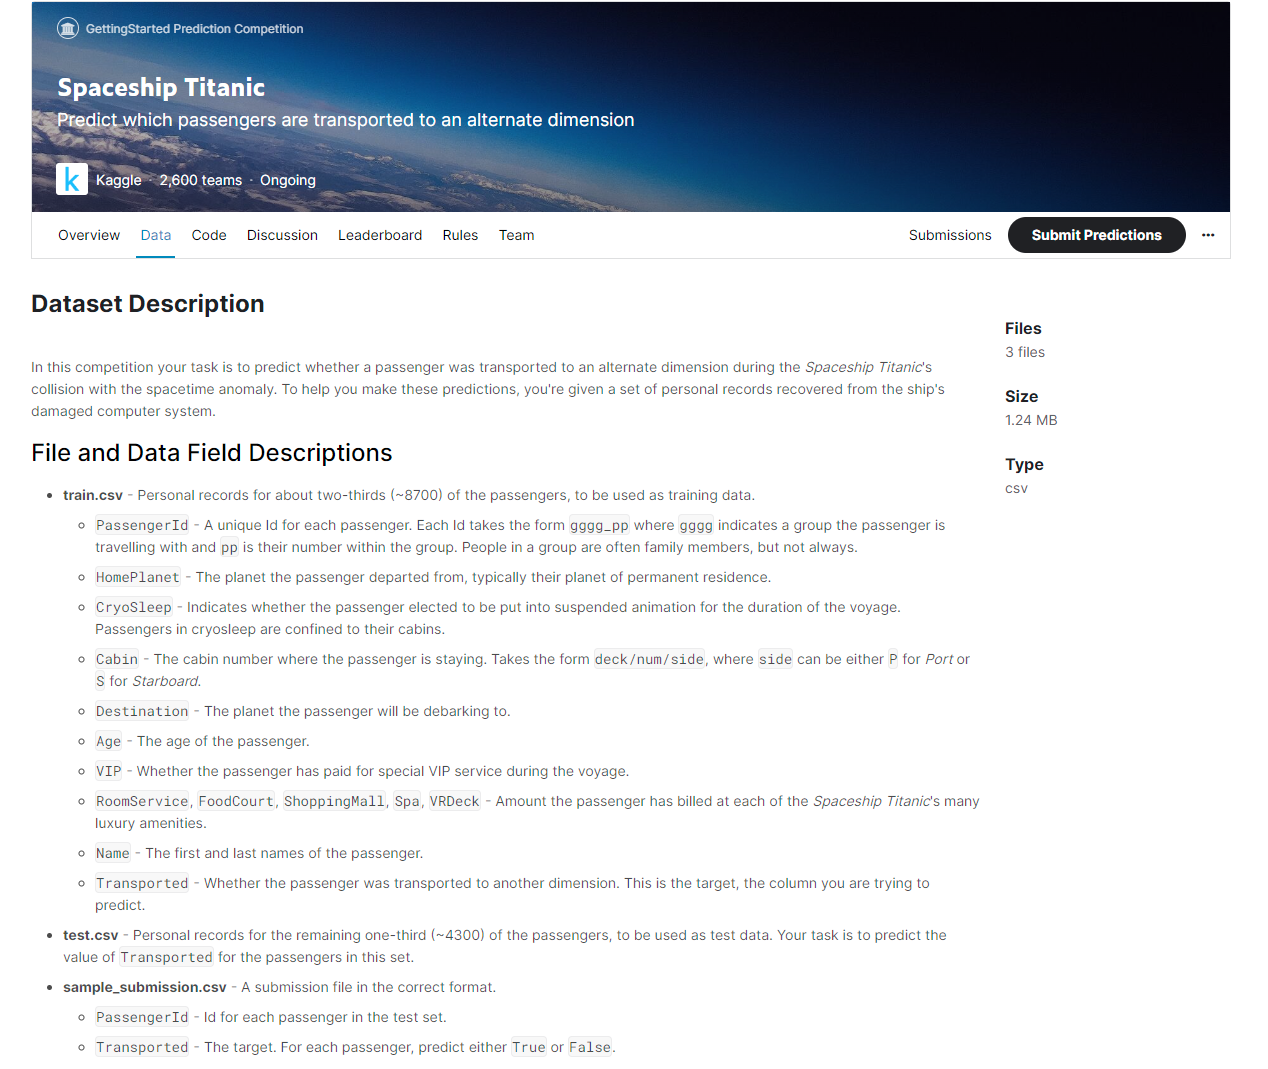

In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [6]:
df = pd.read_csv("space-train.csv")
df.head() # This is how our data looklike

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df.shape # (rows,columns)

(8693, 14)

In [8]:
# information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
# Missing values?
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
# Numerical values
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
# Our target column => Transported
df.Transported.value_counts() 

True     4378
False    4315
Name: Transported, dtype: int64

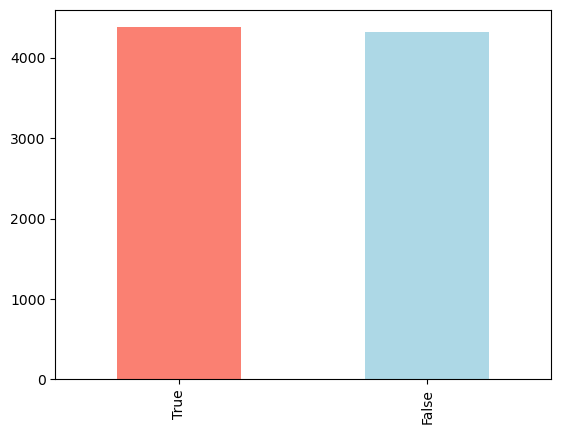

In [12]:
# Visualize some of the data
df.Transported.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [13]:
# Make a correlation matrix
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


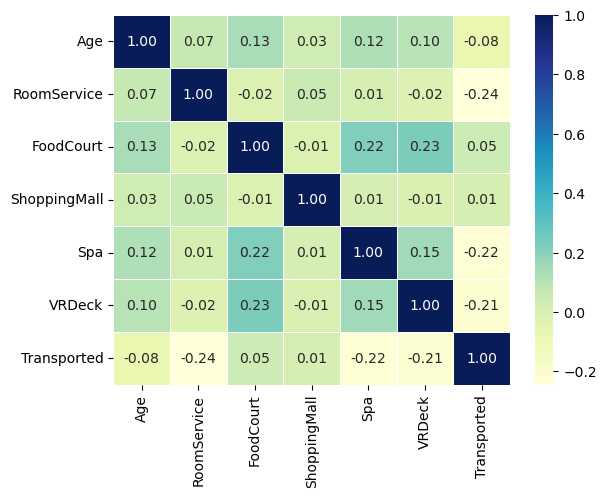

In [14]:
fig, ax = plt.subplots() # for bigger size -> figsize=(15,10)
ax = sns.heatmap(df.corr(), annot=True,
                 linewidths=0.5, fmt='.2f', cmap='YlGnBu');

In [15]:
df.nunique() # too many non-unique value for some columns

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [16]:
# Maybe PassangerId have a correlation with Transported
df_id = df[["PassengerId", "Transported"]].copy()
df_id["PassengerId"] = df_id.PassengerId.str[:4]
df_id.tail() # Last 2 rows says it doesn't

,PassengerId,Transported
8688,9276,False
8689,9278,False
8690,9279,True
8691,9280,False
8692,9280,True


In [17]:
# Looks like we can drop the passengerid and Name 
df_v2 = df.drop(['PassengerId','Name'],axis=1)
df_v2.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [18]:
df_v2.Cabin # Dataset description says these are Deck,Number and Side 

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [19]:
# We can Split Cabin column for maybe a better evaluation
df_v2[['Deck', 'Cabin Number','Port or Starboard']] = df_v2['Cabin'].str.split('/', expand=True)
df_v2=df_v2.drop(['Cabin'],axis=1)
df_v2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin Number,Port or Starboard
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [20]:
# Find the columns which contain string
for label, content in df_v2.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

HomePlanet
CryoSleep
Destination
VIP
Deck
Cabin Number
Port or Starboard


In [21]:
# This will turn all of the string value into category values
for label, content in df_v2.items():
    if pd.api.types.is_string_dtype(content):
        df_v2[label] = content.astype("category").cat.as_ordered()

In [22]:
df_v2.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   HomePlanet         8492 non-null   category
 1   CryoSleep          8476 non-null   category
 2   Destination        8511 non-null   category
 3   Age                8514 non-null   float64 
 4   VIP                8490 non-null   category
 5   RoomService        8512 non-null   float64 
 6   FoodCourt          8510 non-null   float64 
 7   ShoppingMall       8485 non-null   float64 
 8   Spa                8510 non-null   float64 
 9   VRDeck             8505 non-null   float64 
 10  Transported        8693 non-null   bool    
 11  Deck               8494 non-null   category
 12  Cabin Number       8494 non-null   category
 13  Port or Starboard  8494 non-null   category
dtypes: bool(1), category(7), float64(6)
memory usage: 563.7 KB


**Visualizing Data**

In [23]:
pd.crosstab(df_v2.HomePlanet, df_v2.Transported)

Transported,False,True
HomePlanet,,
Earth,2651,1951
Europa,727,1404
Mars,839,920


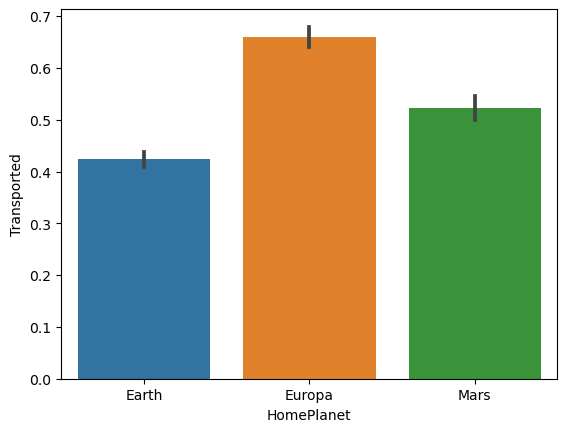

In [24]:
sns.barplot(data=df_v2, x="HomePlanet", y="Transported");

In [25]:
pd.crosstab(df_v2.CryoSleep, df_v2.Transported)

Transported,False,True
CryoSleep,,
False,3650,1789
True,554,2483


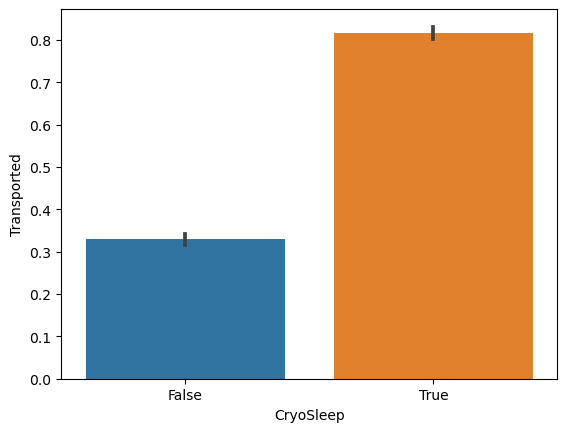

In [26]:
sns.barplot(data=df, x="CryoSleep", y="Transported");

> This indicates CryoSleep passengers had much better Transported rate.

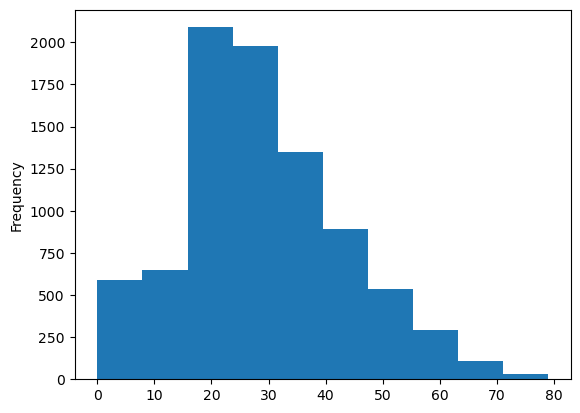

In [27]:
df_v2.Age.plot.hist(); 

In [28]:
pd.crosstab(df_v2.VIP, df_v2.Transported)

Transported,False,True
VIP,,
False,4093,4198
True,123,76


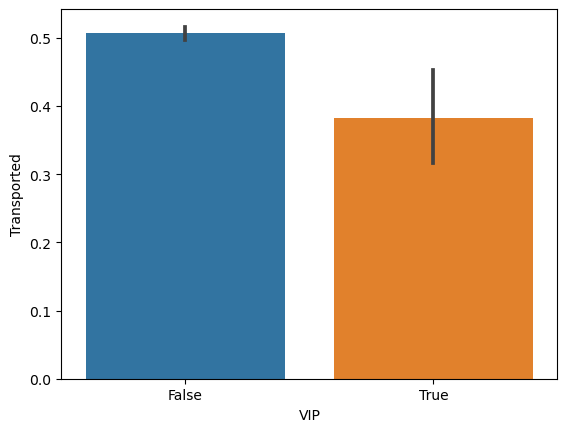

In [29]:
sns.barplot(data=df, x="VIP", y="Transported");

>Looks like Non VIP passengers had better Transported rate than VIP

**Filling missing values**

In [31]:
# Fill numeric rows with the median
for label, content in df_v2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            # Add a binary column which tells us if the data was missing or not..
            df_v2[label+"_is_missing"] = pd.isnull(content)
            
            # Fill missing numeric values with median
            df_v2[label] = content.fillna(content.median())

In [32]:
# turning categorical variables into numbers
for label, content in df_v2.items():
    if not pd.api.types.is_numeric_dtype(content):
        
        # Add a binary column to indicate whether sample had missing value
        df_v2[label+"_is_missing"] = pd.isnull(content)
        
        # Turn categories into numbers and add +1
        df_v2[label] = pd.Categorical(content).codes+1   

In [33]:
df_v2.isna().sum() # no missing values left

HomePlanet                      0
CryoSleep                       0
Destination                     0
Age                             0
VIP                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Transported                     0
Deck                            0
Cabin Number                    0
Port or Starboard               0
Age_is_missing                  0
RoomService_is_missing          0
FoodCourt_is_missing            0
ShoppingMall_is_missing         0
Spa_is_missing                  0
VRDeck_is_missing               0
HomePlanet_is_missing           0
CryoSleep_is_missing            0
Destination_is_missing          0
VIP_is_missing                  0
Deck_is_missing                 0
Cabin Number_is_missing         0
Port or Starboard_is_missing    0
dtype: int64

In [34]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HomePlanet                    8693 non-null   int8   
 1   CryoSleep                     8693 non-null   int8   
 2   Destination                   8693 non-null   int8   
 3   Age                           8693 non-null   float64
 4   VIP                           8693 non-null   int8   
 5   RoomService                   8693 non-null   float64
 6   FoodCourt                     8693 non-null   float64
 7   ShoppingMall                  8693 non-null   float64
 8   Spa                           8693 non-null   float64
 9   VRDeck                        8693 non-null   float64
 10  Transported                   8693 non-null   bool   
 11  Deck                          8693 non-null   int8   
 12  Cabin Number                  8693 non-null   int16  
 13  Por

**Fit the model/algorithm and use it to make prediction on data**

In [36]:
X = df_v2.drop("Transported", axis=1)
y = df_v2.Transported
np.random.seed(90)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestClassifier()

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7878090856814262

In [55]:
# We can fit and evaluate different Scikit-Learn machine learning models

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Linear SVC":LinearSVC(),
          "SGDClassifier": SGDClassifier(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "XGBClassifier":XGBClassifier(eval_metric="rmse"),
          "SVC":SVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    X_train: training data (no labels).
    X_test: testing data (no labels).
    y_train: training labels
    y_test: test labels
    """
    np.random.seed(90)
    # Make a dictionary to keep model score
    model_scores = {} 
    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores 

In [56]:
model_scores = fit_and_score(models, X_train, X_test, y_train,y_test)
model_scores

{'Logistic Regression': 0.7843588269120184,
 'KNN': 0.7521564117308798,
 'Random Forest': 0.7866589994249569,
 'Linear SVC': 0.6682001150086256,
 'SGDClassifier': 0.7084531339850488,
 'DecisionTreeClassifier': 0.7395054629097182,
 'XGBClassifier': 0.7924094307073031,
 'SVC': 0.7745830937320299}

In [59]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ['liblinear']}

# Create a hyperparamater grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [60]:
# Tune LogisticRegression
np.random.seed(90)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [61]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.012742749857031334}

In [62]:
rs_log_reg.score(X_test, y_test) # Almost same score for Logistic Regression

0.7837837837837838

In [63]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [64]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [65]:
rs_rf.score(X_test, y_test) # Almost same score for RandomForest

0.7883841288096607

In [53]:
import warnings
warnings.filterwarnings('ignore')